In [2]:
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
from pandas.plotting import scatter_matrix
import numpy as np
import matplotlib.pyplot as plt

import sklearn.preprocessing as skl_pre
import sklearn.linear_model as skl_lm
import sklearn.discriminant_analysis as skl_da
import sklearn.neighbors as skl_nb

#from IPython.display import set_matplotlib_formats
#set_matplotlib_formats('png')
from IPython.core.pylabtools import figsize
figsize(10, 6) # Width and hight
#plt.style.use('seaborn-white')

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve

# 4.1 Getting started with classification – Breast cancer diagnosis

In this exercise, we will consider the data set `data/biopsy.csv` with data from breast biopsies, for the purpose of diagnosing breast cancer. For each patient, the data set contains nine different attributes (clump thickness, uniformity of cell size, uniformity of cell shape, marginal adhesion, single epithelial cell size, bare nuclei, bland chromatin, normal nucleoli and mitoses) scored on a scale from $1$ to $10$, as well as the physician’s diagnosis (malign or benign).

## Dataset
This data frame `biopsy` contains the following columns:  
`ID`: sample code number (not unique).  
`V1`: clump thickness.  
`V2`: uniformity of cell size.  
`V3`: uniformity of cell shape.  
`V4`: marginal adhesion.  
`V5`: single epithelial cell size.  
`V6`: bare nuclei (16 values are missing).  
`V7`: bland chromatin.  
`V8`: normal nucleoli.  
`V9`: mitoses.  
`class`: "benign" or "malignant".  

## a)
Load and familiarize yourself with the data set, using, e.g.`info()`, `describe()`, `pandas.plotting.scatter_matrix()` and `print()`.

In [5]:
# url = 'data/biopsy.csv'
url = 'https://uu-sml.github.io/course-sml-public/data/biopsy.csv'
biopsy = pd.read_csv(url, na_values='?', dtype={'ID': str}).dropna().reset_index()

BIOPSY INFO:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683 entries, 0 to 682
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   index   683 non-null    int64  
 1   ID      683 non-null    object 
 2   V1      683 non-null    int64  
 3   V2      683 non-null    int64  
 4   V3      683 non-null    int64  
 5   V4      683 non-null    int64  
 6   V5      683 non-null    int64  
 7   V6      683 non-null    float64
 8   V7      683 non-null    int64  
 9   V8      683 non-null    int64  
 10  V9      683 non-null    int64  
 11  class   683 non-null    object 
dtypes: float64(1), int64(9), object(2)
memory usage: 64.2+ KB
None

BIOPSY DESCRIBE:
            index          V1          V2          V3          V4          V5  \
count  683.000000  683.000000  683.000000  683.000000  683.000000  683.000000   
mean   351.355783    4.442167    3.150805    3.215227    2.830161    3.234261   
std    202.563927    2.820761    3.

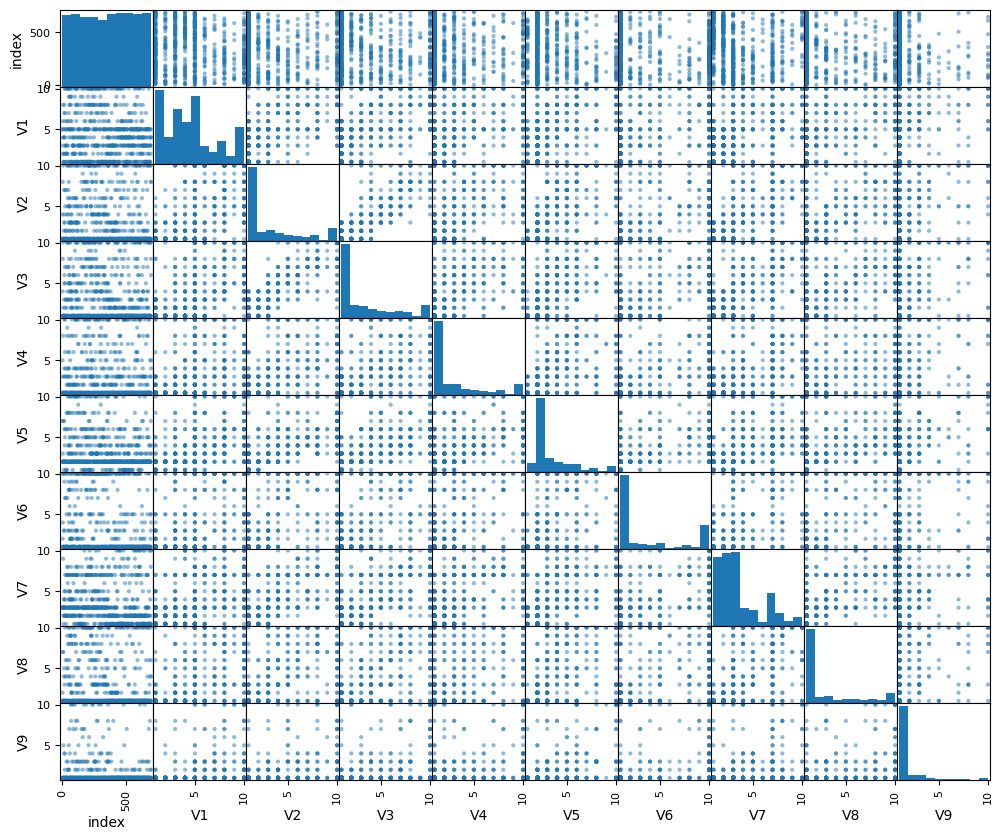

In [6]:
print("BIOPSY INFO:")
print(biopsy.info())
print()

print("BIOPSY DESCRIBE:")
print(biopsy.describe())
print()

print("BIOPSY SCATTER PLOT:")
scatter_matrix(biopsy, figsize=(12, 10), alpha=0.5)
plt.show()



## b)
Split the data randomly into a training set and a test set of approximately similar size.

In [7]:
# Set a seed for reproducibility
np.random.seed(1)

# Sampling indices for training
trainI = np.random.choice(biopsy.shape[0], size=300, replace=False)

# Use isin to create a boolean mask for the training set
trainIndex = biopsy.index.isin(trainI)

# Split the biopsy DataFrame into training and test sets
train_set = biopsy.iloc[trainIndex]  # Training set
test_set = biopsy.iloc[~trainIndex]  # Test set

print("Training set size:", train_set.shape)
print("Test set size:", test_set.shape)


Training set size: (300, 12)
Test set size: (383, 12)


## c) Logistic regression <a id='4.1-c'></a>
Perform logistic regression with `class` as output variable and `V3`, `V4` and `V5` as input variables. Do a prediction on the test set, and compute (i) the fraction of correct predictions and (ii) the confusion matrix (using, for examnple, `pandas.crosstab()`). The commands `skl_lm.LogisticRegression()` and `model.predict()` are useful. Is the performance any good, and what does the confusion matrix tell you?

In [8]:
# Extract input variables (V3, V4, V5) and the output variable (class)
X_train = train_set[['V3', 'V4', 'V5']]
y_train = train_set['class']

X_test = test_set[['V3', 'V4', 'V5']]
y_test = test_set['class']

# Perform logistic regression
model = skl_lm.LogisticRegression(solver='lbfgs')
model.fit(X_train, y_train)
print('MODEL SUMMARY:')
print(model)

MODEL SUMMARY:
LogisticRegression()


In [9]:
# Perform predictions on the test set
y_pred = model.predict(X_test)

# (i) Fraction of correct predictions
correct_predictions = np.mean(y_pred == y_test)
print(f"Fraction of correct predictions (Accuracy): {correct_predictions:.2f}")

# (ii) Confusion matrix
conf_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
print("\nConfusion Matrix:")
print(conf_matrix)

Fraction of correct predictions (Accuracy): 0.93

Confusion Matrix:
Predicted  benign  malignant
Actual                      
benign        239         11
malignant      14        119


## d) LDA
Repeat [(c)](#4.1-c) using LDA. A useful command is `sklearn.discriminant_analysis.LinearDiscriminantAnalysis()`. `sklearn.discriminant_analysis` is imported as `skl_da`

In [10]:
lda = skl_da.LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
print(lda)

# Predict on test set
lda_predictions = lda.predict(X_test)

LinearDiscriminantAnalysis()


In [11]:
# Fraction of correct predictions (accuracy)
accuracy_lda = np.mean(lda_predictions == y_test)
print(f'Accuracy: {accuracy_lda:.4f}')

# Confusion matrix
conf_matrix_lda = pd.crosstab(y_test, lda_predictions, rownames=['Actual'], colnames=['Predicted'])
print('Confusion Matrix:')
print(conf_matrix_lda)

Accuracy: 0.9164
Confusion Matrix:
Predicted  benign  malignant
Actual                      
benign        243          7
malignant      25        108


## e) QDA
Repeat [(c)](#4.1-c) using QDA. A useful command is `sklearn.discriminant_analysis.QuadraticDiscriminantAnalysis()`.

In [12]:
# Train QDA model
qda = skl_da.QuadraticDiscriminantAnalysis()
qda.fit(X_train, y_train)
print(qda)

# Predict on test set
qda_predictions = qda.predict(X_test)

QuadraticDiscriminantAnalysis()


In [13]:
# Fraction of correct predictions (accuracy)
accuracy_qda = np.mean(qda_predictions == y_test)
print(f'Accuracy: {accuracy_qda:.4f}')

# Confusion matrix
conf_matrix_qda = pd.crosstab(y_test, qda_predictions, rownames=['Actual'], colnames=['Predicted'])
print('Confusion Matrix:')
print(conf_matrix_qda)

Accuracy: 0.9347
Confusion Matrix:
Predicted  benign  malignant
Actual                      
benign        237         13
malignant      12        121


## f) KNN
Repeat [(c)](#4.1-c) using $k$-NN (with $k = 1$). A useful commands is `sklearn.neighbors.KNeighborsClassifier()`.

In [14]:
# Train KNN model with k=1
knn = skl_nb.KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
print(knn)

# Predict on test set
knn_predictions = knn.predict(X_test)

KNeighborsClassifier(n_neighbors=1)


In [15]:
# Fraction of correct predictions (accuracy)
accuracy_knn = np.mean(knn_predictions == y_test)
print(f'Accuracy: {accuracy_knn:.4f}')

# Confusion matrix
conf_matrix_knn = pd.crosstab(y_test, knn_predictions, rownames=['Actual'], colnames=['Predicted'])
print('Confusion Matrix:')
print(conf_matrix_knn)

Accuracy: 0.9191
Confusion Matrix:
Predicted  benign  malignant
Actual                      
benign        238         12
malignant      19        114


## g) Try different values for KNN
Use a `for`-loop to explore the performance of $k$-NN for different values of $k$, and plot the fraction of correct
predictions as a function of $k$.

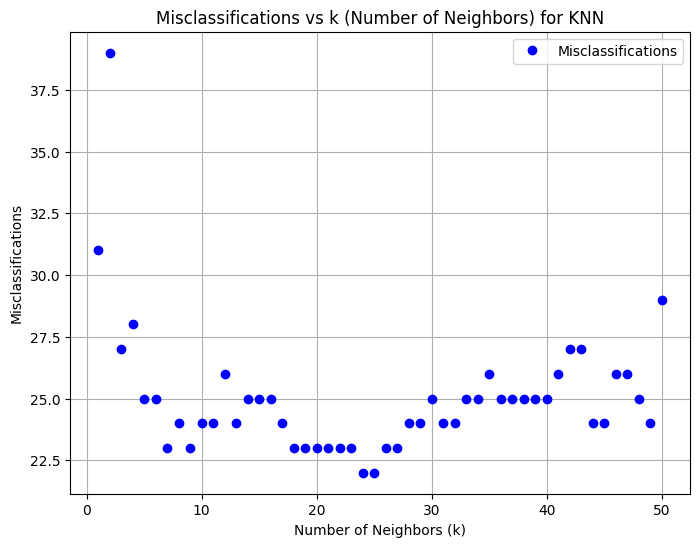

In [16]:
# 1. Create an array to store misclassifications for each k (from 1 to 50)
misclassifications = []

# 2. Train and predict for k values from 1 to 50, and store misclassification counts
for k in range(1, 51):
    knn = skl_nb.KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    knn_predictions = knn.predict(X_test)
    misclassification_count = np.sum(knn_predictions != y_test)
    misclassifications.append(misclassification_count)

# 3. Plot misclassification counts against k values (dots only, no connecting lines)
plt.figure(figsize=(8, 6))
plt.plot(range(1, 51), misclassifications, 'o', color='b', label='Misclassifications')  # 'o' for dots
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Misclassifications')
plt.title('Misclassifications vs k (Number of Neighbors) for KNN')
plt.grid(True)
plt.legend()
plt.show()


## h) ROC for logistic regression
Use a `for`-loop to explore how the true and false positive rates in logistic regression are affected by different threshold values, and plot the result as a `ROC curve`. (see Figure 4.7 and Table 4.1 in the book).

In [17]:
# Part 1: Create variables
true_positive_rate = []
false_positive_rate = []
positive_class = 'malignant'
negative_class = 'benign'
P = np.sum(y_test == positive_class)  # Number of positive examples in test data
N = np.sum(y_test == negative_class)  # Number of negative samples in test data
threshold = np.linspace(0.00, 1, 101)

In [18]:
# Part 2: Train the model
model = skl_lm.LogisticRegression(solver='lbfgs')
model.fit(X_train, y_train)
predict_prob = model.predict_proba(X_test)

positive_class_index = np.argwhere(model.classes_ == positive_class).squeeze()

In [19]:
# Part 3: Calculate TPR and FPR for each threshold
for r in threshold:
    prediction = np.where(predict_prob[:, positive_class_index] > r, positive_class, negative_class)
    
    FP = np.sum((prediction == positive_class) & (y_test == negative_class))  # False Positive
    TP = np.sum((prediction == positive_class) & (y_test == positive_class))  # True Positive
    
    false_positive_rate.append(FP / N)
    true_positive_rate.append(TP / P)

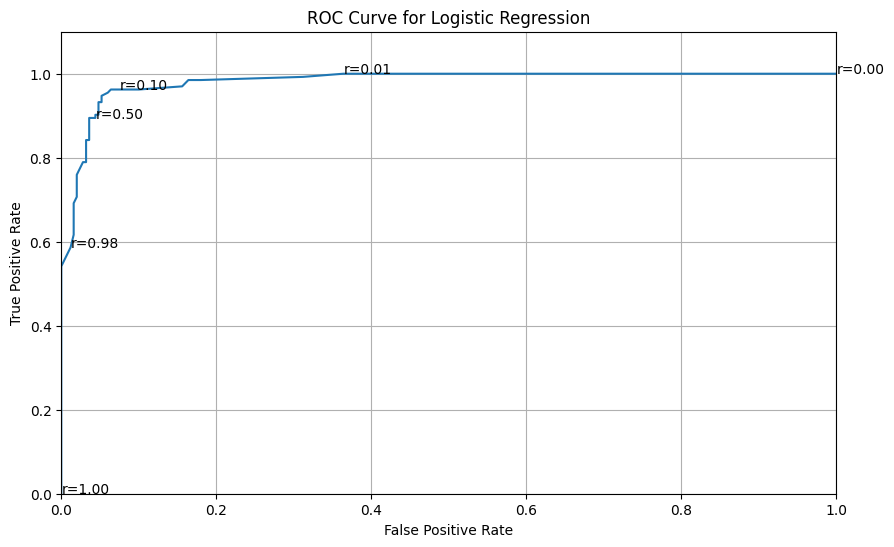

In [20]:
# Part 4: Plot the ROC curve
plt.plot(false_positive_rate, true_positive_rate)
for idx in [0, 1, 10, 50, 98, 100]:
    plt.text(false_positive_rate[idx], true_positive_rate[idx], f"r={threshold[idx]:.2f}")

plt.xlim([0, 1])
plt.ylim([0, 1.1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logistic Regression')
plt.grid(True)
plt.show()

## i)
Try to find another set of inputs (perhaps by also considering transformations of the attributes) which gives a better result than you have achieved so far. You may also play with the threshold values. (“Better” is on purpose left vague. For this problem, the implications of a false negative (=`benign`) misclassification is probably more severe than a false positive (=`malignant`) misclassification.)

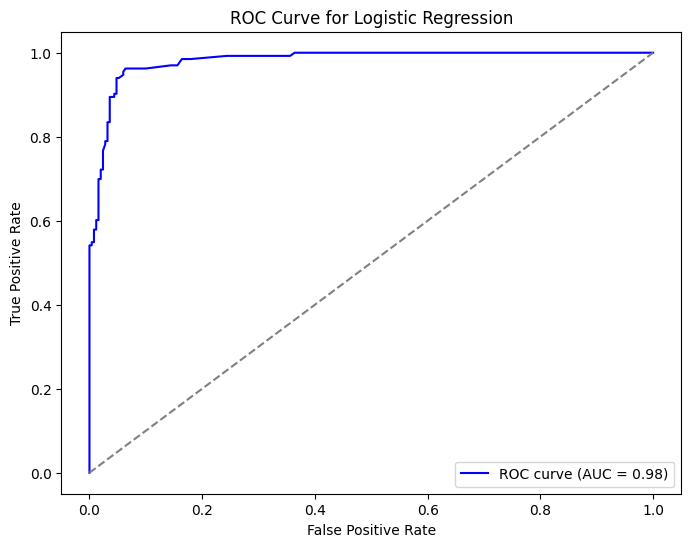

Confusion Matrix:
[[238  12]
 [  9 124]]


In [21]:
# Class labels assignment
class_0 = 'benign'
class_1 = 'malignant'

# Feature transformation: Polynomial Features and Scaling
poly = PolynomialFeatures(degree=2)  # Creating polynomial features to capture non-linear relationships
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

scaler = StandardScaler()  # Scaling the features
X_train_scaled = scaler.fit_transform(X_train_poly)
X_test_scaled = scaler.transform(X_test_poly)

# Logistic Regression with class weights (Here, more weight is given to the malignant class to penalize false negatives)
model = LogisticRegression(class_weight={class_0: 1, class_1: 5}, solver='lbfgs')  # More weight to malignant class (class 1)
model.fit(X_train_scaled, y_train)

# Predict probabilities
y_prob = model.predict_proba(X_test_scaled)[:, 1]  # Predict probabilities for the positive class (malignant)

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob, pos_label=class_1)
roc_auc = roc_auc_score(y_test, y_prob)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logistic Regression')
plt.legend(loc='lower right')
plt.show()

# Confusion Matrix
y_pred = model.predict(X_test_scaled)  # Make predictions based on the test set
conf_matrix = confusion_matrix(y_test, y_pred)  # Compute confusion matrix
print(f"Confusion Matrix:\n{conf_matrix}")


# 4.2 Decision boundaries
The following code generates some data with $x_1$ and $x_2$ both in $[0, 10]$ and $y$ either $0$ or $1$, and plots the decision boundary for a logistic regression model.

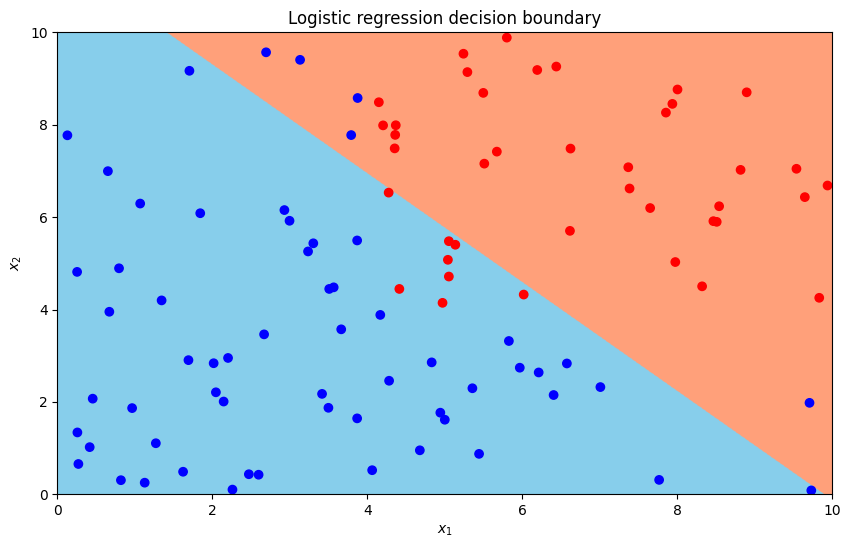

In [22]:
# generate data
np.random.seed(2)
N = 100
x1 = np.random.uniform(0, 10, N)
x2 = np.random.uniform(0, 10, N)
y = np.ones(N)
y[x1<4] = 0
y[x2<4] = 0
X = pd.DataFrame({'x1': x1, 'x2': x2})

# learn a logistic regression model
model = skl_lm.LogisticRegression(solver='lbfgs')
model.fit(X, y)

# classify the points in the whole domain
res = 0.01   # resolution of the squares
xs1 = np.arange(0, 10 + res, res)
xs2 = np.arange(0, 10 + res, res)
xs1, xs2 = np.meshgrid(xs1, xs2)    # Creating the grid for all the data points
X_all = pd.DataFrame({'x1': xs1.flatten(), 'x2': xs2.flatten()})
prediction = model.predict(X_all)

from matplotlib.colors import LinearSegmentedColormap
mycmap = LinearSegmentedColormap.from_list('mycmap', ['skyblue', 'lightsalmon'])
plt.imshow(prediction.reshape(xs1.shape[0],-1),
           cmap=mycmap,
           origin='lower',
           extent=[0,10,0,10],
           aspect='auto')

# Plot of the data points and their label
plt.scatter(x1, x2, c=y, cmap='bwr') # blue - white -red colormap

plt.title('Logistic regression decision boundary')
plt.xlim([0,10])
plt.ylim([0,10])
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.show()

## (a)
Run the code and verify that it reproduces the figure, and make sure you understand the figure. What is the misclassification rate here?

In [23]:
predictions_train = model.predict(X)
misclassified = np.sum(predictions_train != y)

misclassification_rate = misclassified / len(y)
print(f'Misclassification rate on training set: {misclassification_rate * 100:.2f}%')

Misclassification rate on training set: 13.00%


## (b)
Modify the code to plot the decision boundary for a LDA classifier. What differences do you see? What is the misclassification rate?

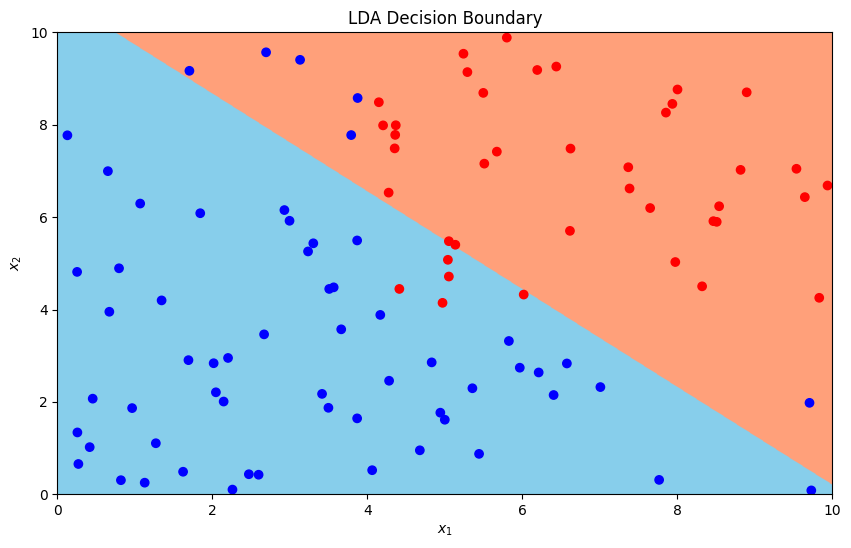

In [24]:
# learn a Linear Discriminant Analysis model
lda_model = skl_da.LinearDiscriminantAnalysis()
lda_model.fit(X, y)

# classify the points in the whole domain
res = 0.01  # resolution of the squares
xs1 = np.arange(0, 10 + res, res)
xs2 = np.arange(0, 10 + res, res)
xs1, xs2 = np.meshgrid(xs1, xs2)  # Creating the grid for all the data points
X_all = pd.DataFrame({'x1': xs1.flatten(), 'x2': xs2.flatten()})
prediction_lda = lda_model.predict(X_all)

# Define a colormap for the decision boundary plot
from matplotlib.colors import LinearSegmentedColormap
mycmap = LinearSegmentedColormap.from_list('mycmap', ['skyblue', 'lightsalmon'])

# Plot the LDA decision boundary
plt.imshow(prediction_lda.reshape(xs1.shape[0], -1),
           cmap=mycmap,
           origin='lower',
           extent=[0, 10, 0, 10],
           aspect='auto')

# Plot of the data points and their label
plt.scatter(x1, x2, c=y, cmap='bwr')  # blue - white - red colormap
plt.title('LDA Decision Boundary')
plt.xlim([0, 10])
plt.ylim([0, 10])
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.show()

In [25]:
# Make predictions on the training data
predictions_train = lda_model.predict(X)
misclassified = np.sum(predictions_train != y)

# Misclassification rate
misclassification_rate = misclassified / len(y)
print(f'Misclassification rate on training set: {misclassification_rate * 100:.2f}%')


Misclassification rate on training set: 11.00%


## (c)
Modify the code to plot the decision boundary for a QDA classifier. What differences do you see? What is the misclassification rate?

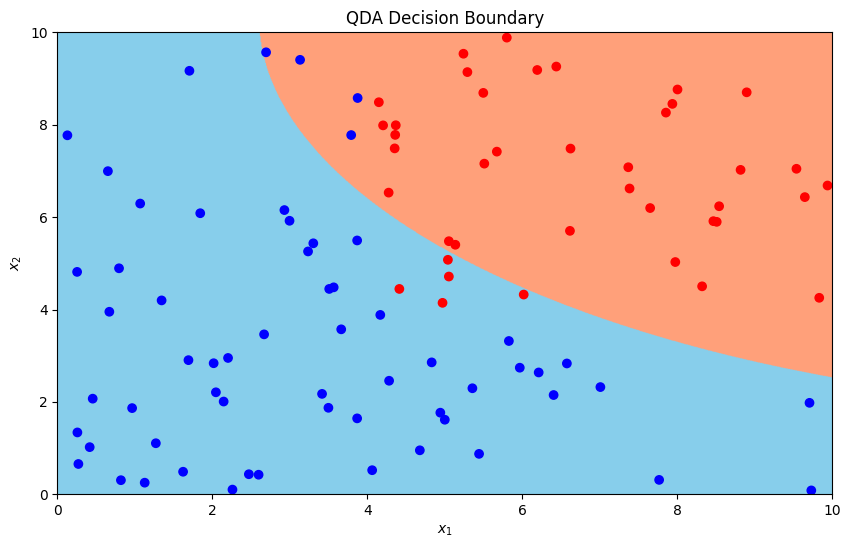

In [26]:
# learn a Quadratic Discriminant Analysis model
qda_model = skl_da.QuadraticDiscriminantAnalysis()
qda_model.fit(X, y)

# classify the points in the whole domain
res = 0.01  # resolution of the squares
xs1 = np.arange(0, 10 + res, res)
xs2 = np.arange(0, 10 + res, res)
xs1, xs2 = np.meshgrid(xs1, xs2)  # Creating the grid for all the data points
X_all = pd.DataFrame({'x1': xs1.flatten(), 'x2': xs2.flatten()})
prediction_qda = qda_model.predict(X_all)

# Define a colormap for the decision boundary plot
from matplotlib.colors import LinearSegmentedColormap
mycmap = LinearSegmentedColormap.from_list('mycmap', ['skyblue', 'lightsalmon'])

# Plot the QDA decision boundary
plt.imshow(prediction_qda.reshape(xs1.shape[0], -1),
           cmap=mycmap,
           origin='lower',
           extent=[0, 10, 0, 10],
           aspect='auto')

# Plot of the data points and their label
plt.scatter(x1, x2, c=y, cmap='bwr')  # blue - white - red colormap
plt.title('QDA Decision Boundary')
plt.xlim([0, 10])
plt.ylim([0, 10])
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.show()

In [27]:
# Make predictions on the training data
predictions_train_qda = qda_model.predict(X)
misclassified_qda = np.sum(predictions_train_qda != y)

# Misclassification rate
misclassification_rate_qda = misclassified_qda / len(y)
print(f'Misclassification rate on training set (QDA): {misclassification_rate_qda * 100:.2f}%')


Misclassification rate on training set (QDA): 9.00%


## (d)
Modify the code to plot the decision boundary for a $k$-NN classifier. What differences do you see? What is the misclassification rate?

In [38]:
# Train the model with the best k
no_neighbours = 1
best_knn = skl_nb.KNeighborsClassifier(n_neighbors=no_neighbours)
best_knn.fit(X, y)

# Create a grid to classify points in the entire domain
res = 0.01   # Resolution of the squares
xs1 = np.arange(0, 10 + res, res)
xs2 = np.arange(0, 10 + res, res)
xs1, xs2 = np.meshgrid(xs1, xs2)    # Creating the grid for all the data points
X_all = pd.DataFrame({'x1': xs1.flatten(), 'x2': xs2.flatten()})

# Classify the points in the grid
prediction = best_knn.predict(X_all)

# Plot the decision boundary
plt.figure(figsize=(8, 6))
from matplotlib.colors import LinearSegmentedColormap
mycmap = LinearSegmentedColormap.from_list('mycmap', ['skyblue', 'lightsalmon'])
plt.imshow(prediction.reshape(xs1.shape[0], -1),
           cmap=mycmap,
           origin='lower',
           extent=[0, 10, 0, 10],
           aspect='auto')

# Plot the data points and their labels
plt.scatter(x1, x2, c=y, cmap='bwr')  # Blue - white - red colormap

# Set labels and title
plt.title(f'KNN Decision Boundary with k={no_neighbours}')
plt.xlim([0, 10])
plt.ylim([0, 10])
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.show()



ValueError: Found input variables with inconsistent numbers of samples: [100, 40]

In [29]:
# Calculate and print the misclassification rate on the whole dataset
predictions_train = best_knn.predict(X)
misclassified = np.sum(predictions_train != y)
misclassification_rate = misclassified / len(y)
print(f'Misclassification rate on the whole dataset with k=1: {misclassification_rate * 100:.2f}%')

Misclassification rate on the whole dataset with k=1: 2.00%


## (e)
What happens with the decision boundary for logistic regression if you include the term $x_1x_2$ as an input? What is the misclassification rate?

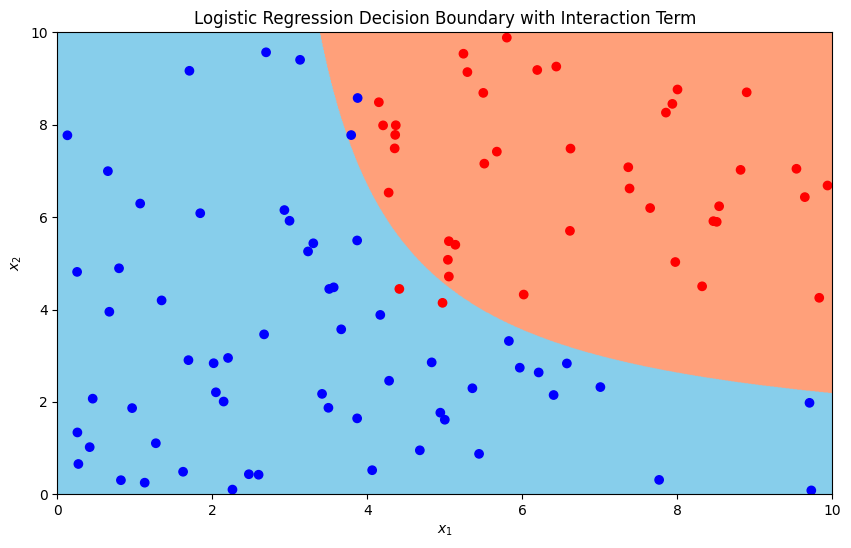

In [30]:
# Add the interaction term x1 * x2
X['x1x2'] = X['x1'] * X['x2']

# Train logistic regression model with the interaction term
model = skl_lm.LogisticRegression(solver='lbfgs')
model.fit(X, y)

# Classify the points in the whole domain
res = 0.01   # resolution of the squares
xs1 = np.arange(0, 10 + res, res)
xs2 = np.arange(0, 10 + res, res)
xs1, xs2 = np.meshgrid(xs1, xs2)    # Creating the grid for all the data points
X_all = pd.DataFrame({'x1': xs1.flatten(), 'x2': xs2.flatten()})
X_all['x1x2'] = X_all['x1'] * X_all['x2']  # Add interaction term to the grid data
prediction = model.predict(X_all)

# Plot the decision boundary
from matplotlib.colors import LinearSegmentedColormap
mycmap = LinearSegmentedColormap.from_list('mycmap', ['skyblue', 'lightsalmon'])
plt.imshow(prediction.reshape(xs1.shape[0],-1),
           cmap=mycmap,
           origin='lower',
           extent=[0,10,0,10],
           aspect='auto')

# Plot of the data points and their label
plt.scatter(x1, x2, c=y, cmap='bwr') # blue - white -red colormap
plt.title('Logistic Regression Decision Boundary with Interaction Term')
plt.xlim([0,10])
plt.ylim([0,10])
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.show()

In [31]:
# Misclassification rate calculation
y_pred = model.predict(X)
misclassified = np.sum(y_pred != y)
misclassification_rate = misclassified / len(y)
print(f'Misclassification rate with interaction term: {misclassification_rate * 100:.2f}%')

Misclassification rate with interaction term: 4.00%


# 4.3 Why not linear regression?
In this exercise, we explore why linear regression might not be well suited for classification problems.

## (a)
Construct and plot a data set as follows: Let $x_i$ be samples $x_i = i$ in a sequence from $i = 1$ to $i = 40$. Let $y_i = 0$ for all $i = 1 : 40$, except for $i = 34, 38, 39, 40$ where $y_i = 1$. Hence, $y$ belongs to either of two classes, $0$ and $1$.

In [32]:
# Construct dataset
x = np.arange(1, 41).reshape(-1, 1)  # x = 1 to 40
y = np.zeros(40)  # Initialize y to 0
y[33] = 1  # Set y value at index 33 to 1 (corresponds to x=34)
y[37] = 1  # Set y value at index 37 to 1 (corresponds to x=38)
y[38] = 1  # Set y value at index 38 to 1 (corresponds to x=39)
y[39] = 1  # Set y value at index 39 to 1 (corresponds to x=40)


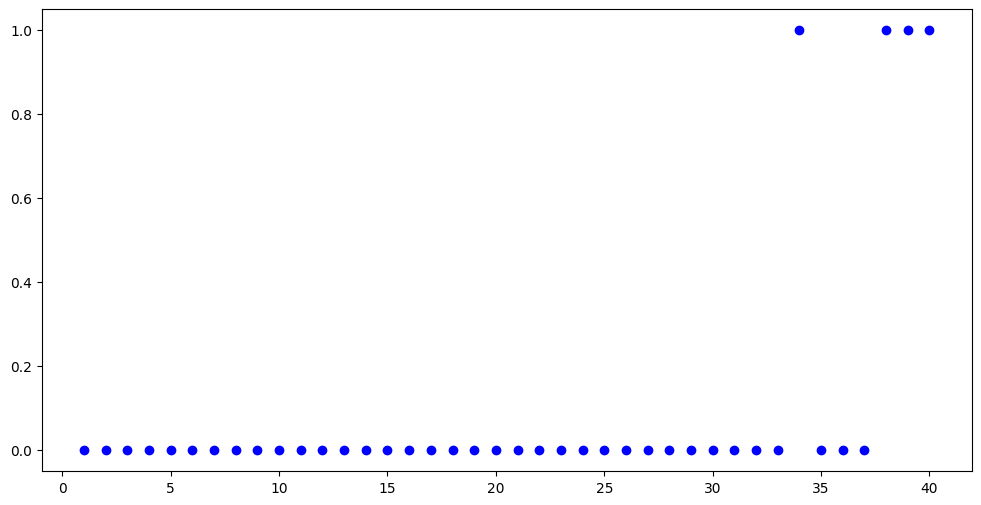

In [33]:
# Plotting the data 
plt.figure(figsize=(12, 6))
plt.scatter(x, y, color='blue', label='Actual', zorder=5)

## (b)
Now, the problem is to fit a model which is able to predict the output $y$ from the input $x$. Start with a linear regression model (command `skl_lm.LinearRegression()`), and simply threshold its predictions at 0.5 (the average of 0 and 1, the two classes). Plot the prediction. How good is the prediction?

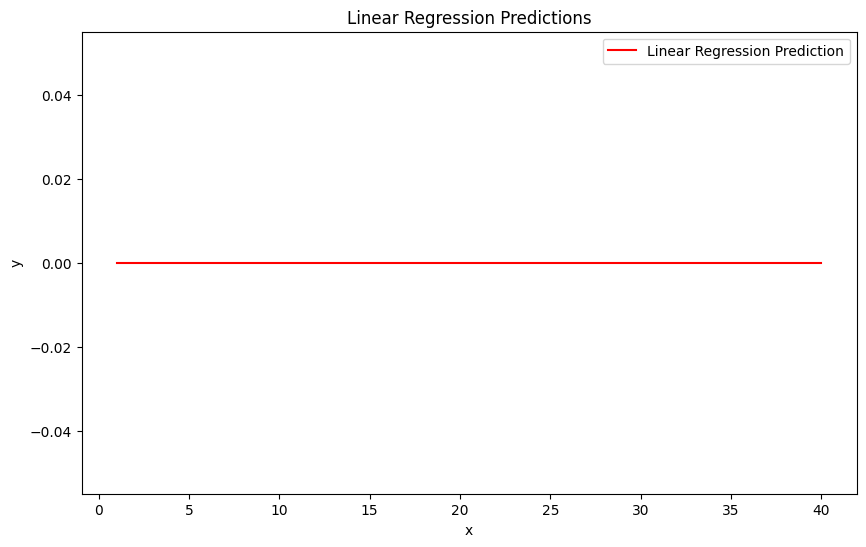

In [34]:
# Linear Regression model
linear_model = skl_lm.LinearRegression()
linear_model.fit(x, y)
y_pred_linear = linear_model.predict(x)
y_pred_linear_thresholded = (y_pred_linear > 0.5).astype(int)


# Plot Linear Regression predictions
plt.plot(x, y_pred_linear_thresholded, color='red', label='Linear Regression Prediction', zorder=4)

# Labels and legend
plt.title('Linear Regression Predictions')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

## (c)
Try instead logistic regression using `skl_lm.LogisticRegression()` command (set the parameter `C` to $1000$) and plot the prediction. How good is the prediction, and what advantages does logistic regression have over linear regression for this classification problem?  

# 4.4 k-NN
In this exercise, we are going to explore an important user aspect of $k$-NN.

## (a)
Make $200$ draws $x_1$ from a $\mathcal{N}(0, 1^2)$ distribution, and $200$ draws $x_2$ from $\mathcal{N}(0, 10^4)$. Also construct $y$ such that $y = 1$ if $x_1 \cdot x_2$ is positive, and $0$ otherwise. Split the data set randomly into a test and a training data set (equally sized).

## (b)
Use $k$-NN (choose $k$ yourself) to predict the test output $y$ using $x_1$ and $x_2$ as inputs. How well do you perform?

## (c)
Now replace $x_2$ with $200$ draws from $\mathcal{N}(0, 1^2)$, and perform $k$-NN classification anew. How well do you perform this time? Explain the difference!

## (d)
Explore how the `sklearn.preprocessing.scale()` function can help for such problems encountered in (b)!

# 4.5 Multiclass classification
In the course, we have focused on the classification problem for 2 classes. The methods can, however, be generalized to more than two classes. In `Python`, the commands `skl_da.LinearDiscriminantAnalysis()`, `skl_da.QuadraticDiscriminantAnalysis()` and `skl_nb.KNeighborsClassifier()` can all be used directly for multi-class problems as well, which we will do in this exercise.

## (a)
Load and familiarize yourself with the data set `iris`, and split it randomly into a training and a test data set.

**Description**

This famous (Fisher's or Anderson's) `iris` data set gives the measurements in centimeters of the variables sepal length and width and petal length and width, respectively, for $50$ flowers from each of $3$ species of iris. The species are Iris setosa, versicolor, and virginica.

**Format**

iris is a data frame with $150$ cases (rows) and $5$ variables (columns) named `Sepal.Length`, `Sepal.Width`, `Petal.Length`, `Petal.Width`, and `Species`.

In [35]:
# url = 'data/iris.csv'
url = 'https://uu-sml.github.io/course-sml-public/data/iris.csv'
iris = pd.read_csv(url)

## (b)
Use all inputs (`Sepal.Length`, `Sepal.Width`, `Petal.Length`, `Petal.Width`) to predict the output `Species` (`setosa`,
`versicolor` and `virginica`) using LDA, QDA, and $k$-NN, respectively.